In [38]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [39]:
hepatitis = pd.read_csv('Hepatitis.csv')
hepatitis

,Unnamed: 0,RegionName,Time,Category_gender,Category_age,Chronic_percentage,Acute_percentage
0,0,Austria,2008,Female,0-4,NaN,0.00
1,1,Austria,2008,Female,15-19,NaN,10.92
2,2,Austria,2008,Female,20-24,NaN,2.08
3,3,Austria,2008,Female,25-34,NaN,11.96
4,4,Austria,2008,Female,35-44,NaN,7.28
...,...,...,...,...,...,...,...
9499,9499,United Kingdom,2019,Male,35-44,1.53,11.59
9500,9500,United Kingdom,2019,Male,45-54,0.90,12.20
9501,9501,United Kingdom,2019,Male,5-14,0.00,0.00
9502,9502,United Kingdom,2019,Male,55-64,0.45,9.15


In [40]:
print(hepatitis.isna().sum())

# We found some missing values due to a lack of data measurements

Unnamed: 0               0
RegionName               0
Time                     0
Category_gender          0
Category_age             0
Chronic_percentage    1764
Acute_percentage       468
dtype: int64


<Axes: >

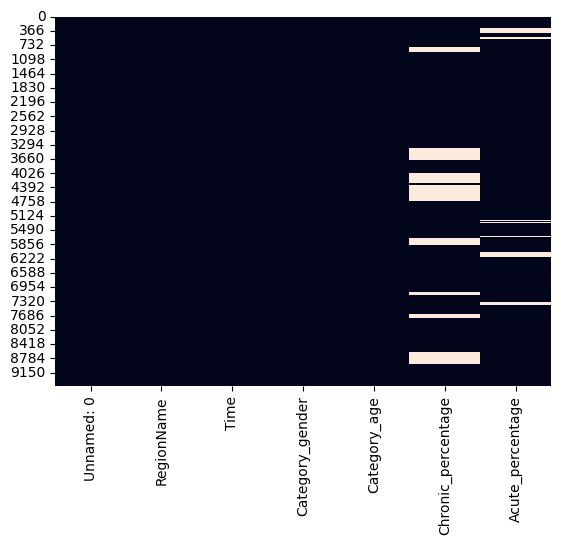

In [41]:
# heatmap to visualize where the Nan values are
sns.heatmap(hepatitis.isnull(), cbar=False)

In [42]:
# Ensure that you're working with the original DataFrame and avoid modifying a copy
hepatitis.loc[:, 'Acute_percentage'] = (
    hepatitis.groupby('RegionName')['Acute_percentage']
    .transform(lambda x: x.interpolate(method='linear'))
)


In [43]:
#Forward or Backward Fill: Use ffill or bfill to fill remaining NaNs with the last or next available value, respectively

hepatitis['Acute_percentage'] = hepatitis.groupby('RegionName')['Acute_percentage'].transform(lambda x: x.interpolate(method='linear').ffill().bfill())

In [44]:
hepatitis.loc[:, 'Chronic_percentage'] = (
    hepatitis.groupby('RegionName')['Chronic_percentage']
    .transform(lambda x: x.interpolate(method='linear').ffill().bfill())
)

In [45]:
hepatitis.isna().sum()

Unnamed: 0              0
RegionName              0
Time                    0
Category_gender         0
Category_age            0
Chronic_percentage    954
Acute_percentage        0
dtype: int64

In [47]:
hepatitis.drop(columns=['Unnamed: 0'], inplace=True)

In [48]:
# imputing the missing values of chronic percentage for France
imputer = SimpleImputer(strategy='mean')
hepatitis['Chronic_percentage'] = imputer.fit_transform(hepatitis[['Chronic_percentage']])


In [49]:
hepatitis.describe()

,Time,Chronic_percentage,Acute_percentage
count,9504.000000,9504.000000,9504.000000
mean,2014.973485,0.357936,4.855457
std,5.041690,1.027346,7.327497
min,2006.000000,0.000000,0.000000
25%,2011.000000,0.000000,0.000000
50%,2015.000000,0.020000,2.345000
75%,2019.000000,0.357936,7.040000
max,2023.000000,17.250000,100.000000


In [50]:
# Filter rows with 100% in Acute_percentage
suspect_rows = hepatitis[hepatitis['Acute_percentage'] == 100]
print(suspect_rows)


         RegionName  Time Category_gender Category_age  Chronic_percentage  \
499         Croatia  2022            Male        35-44                0.00   
588          Cyprus  2012            Male        25-34                0.00   
653          Cyprus  2016          Female        45-54                0.00   
751          Cyprus  2021            Male        35-44                0.06   
786          Cyprus  2023            Male        25-34                1.20   
4838        Iceland  2019            Male        45-54                1.04   
4844        Iceland  2020          Female        20-24                0.77   
5268          Italy  2021            Male        25-34                0.00   
5686  Liechtenstein  2023            Male        55-64                0.00   
5953     Luxembourg  2013            Male        35-44                0.96   
5971     Luxembourg  2014            Male        35-44                0.03   
7432       Portugal  2011            Male        55-64          

In [51]:
# Replace 100% values in Acute_percentage with NaN
hepatitis.loc[hepatitis['Acute_percentage'] == 100, 'Acute_percentage'] = None

# Interpolate NaN values
hepatitis['Acute_percentage'] = hepatitis.groupby('RegionName')['Acute_percentage'].transform(lambda x: x.interpolate(method='linear'))

In [52]:
hepatitis['Category_gender'].value_counts() 


Category_gender
Female    4752
Male      4752
Name: count, dtype: int64

In [53]:
hepatitis['Category_age'].value_counts()

Category_age
0-4      1056
15-19    1056
20-24    1056
25-34    1056
35-44    1056
45-54    1056
5-14     1056
55-64    1056
65+      1056
Name: count, dtype: int64

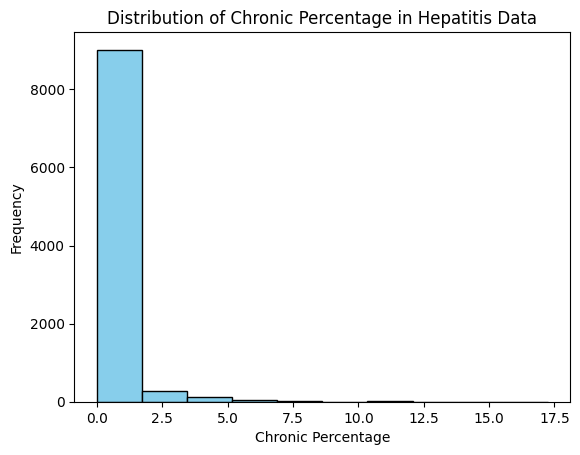

In [54]:
#This histogram visualizes how frequently each range of Chronic_percentage occurs in the dataset
# allowing you to assess the spread, central tendency, and presence of any potential skew in these values.
plt.hist(hepatitis['Chronic_percentage'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Chronic Percentage')
plt.ylabel('Frequency')
plt.title('Distribution of Chronic Percentage in Hepatitis Data')
plt.show()

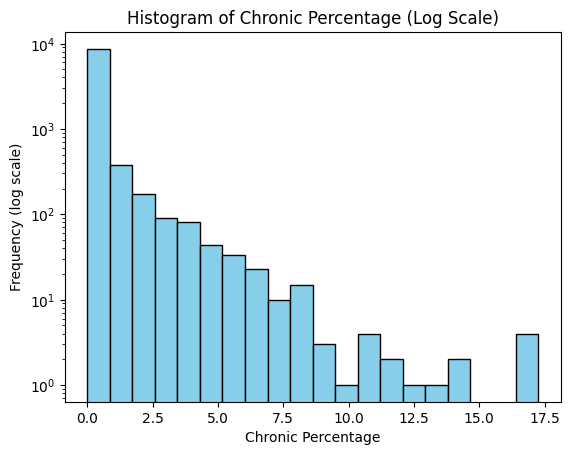

In [55]:
# Histogram in log scale - better visaulization
plt.hist(hepatitis['Chronic_percentage'], bins=20, color='skyblue', edgecolor='black')
plt.yscale('log')
plt.title("Histogram of Chronic Percentage (Log Scale)")
plt.xlabel("Chronic Percentage")
plt.ylabel("Frequency (log scale)")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

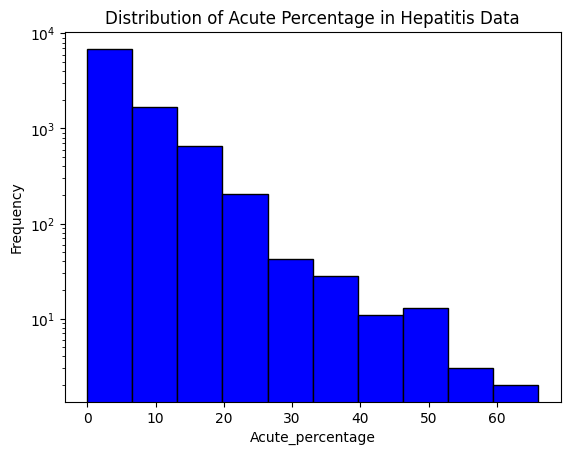

In [56]:
plt.hist(hepatitis['Acute_percentage'], bins=10, color='blue', edgecolor= 'black')
plt.yscale('log')
plt.xlabel('Acute_percentage')
plt.ylabel('Frequency')
plt.title('Distribution of Acute Percentage in Hepatitis Data')
plt.show

In [59]:
hepatitis.rename(columns={'RegionName': 'Country', 'Category_gender': 'Gender', 'Category_age': 'Age'}, inplace=True)
hepatitis

,Country,Time,Gender,Age,Chronic_percentage,Acute_percentage
0,Austria,2008,Female,0-4,0.00,0.00
1,Austria,2008,Female,15-19,0.00,10.92
2,Austria,2008,Female,20-24,0.00,2.08
3,Austria,2008,Female,25-34,0.00,11.96
4,Austria,2008,Female,35-44,0.00,7.28
...,...,...,...,...,...,...
9499,United Kingdom,2019,Male,35-44,1.53,11.59
9500,United Kingdom,2019,Male,45-54,0.90,12.20
9501,United Kingdom,2019,Male,5-14,0.00,0.00
9502,United Kingdom,2019,Male,55-64,0.45,9.15


In [60]:
# delete EU from country 
hepatitis = hepatitis[~hepatitis['Country'].str.contains('EU', na=False)]
hepatitis

,Country,Time,Gender,Age,Chronic_percentage,Acute_percentage
0,Austria,2008,Female,0-4,0.00,0.00
1,Austria,2008,Female,15-19,0.00,10.92
2,Austria,2008,Female,20-24,0.00,2.08
3,Austria,2008,Female,25-34,0.00,11.96
4,Austria,2008,Female,35-44,0.00,7.28
...,...,...,...,...,...,...
9499,United Kingdom,2019,Male,35-44,1.53,11.59
9500,United Kingdom,2019,Male,45-54,0.90,12.20
9501,United Kingdom,2019,Male,5-14,0.00,0.00
9502,United Kingdom,2019,Male,55-64,0.45,9.15


In [61]:
hepatitis.isnull().sum()

Country               0
Time                  0
Gender                0
Age                   0
Chronic_percentage    0
Acute_percentage      0
dtype: int64

In [62]:
hepatitis.head()

,Country,Time,Gender,Age,Chronic_percentage,Acute_percentage
0,Austria,2008,Female,0-4,0.0,0.00
1,Austria,2008,Female,15-19,0.0,10.92
2,Austria,2008,Female,20-24,0.0,2.08
3,Austria,2008,Female,25-34,0.0,11.96
4,Austria,2008,Female,35-44,0.0,7.28


In [63]:
hepatitis.to_csv('Hepatitis_eda.csv')

<Axes: xlabel='Chronic_percentage'>

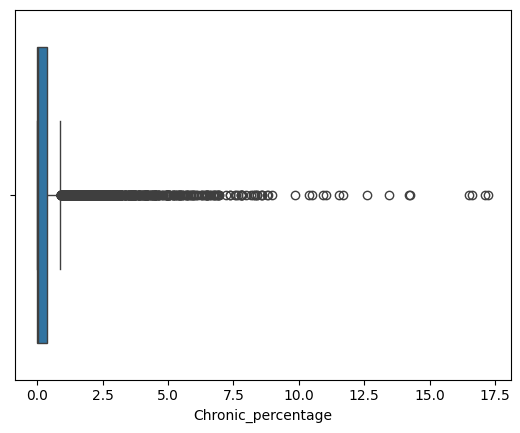

In [64]:
sns.boxplot(x='Chronic_percentage', data=hepatitis)

In [65]:
hepatitis[['Chronic_percentage', 'Acute_percentage']].corr()

,Chronic_percentage,Acute_percentage
Chronic_percentage,1.000000,0.213006
Acute_percentage,0.213006,1.000000


<Axes: xlabel='Chronic_percentage', ylabel='Acute_percentage'>

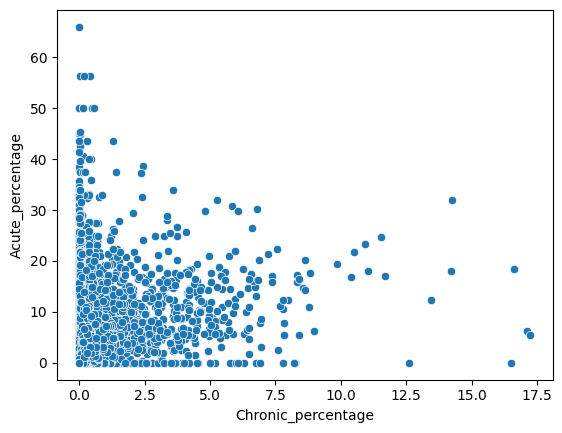

In [66]:
sns.scatterplot(x='Chronic_percentage', y='Acute_percentage', data=hepatitis)

# We now proceed to create a Machine Learning model